In [61]:
from astropy.io import fits
import numpy as np
import glob
import os
from pathlib import Path
import re
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
#scattered light correction
def make_coord(x,y):
    a = np.array([[[x,y]]])
    coordinate = np.tile(a,((2*x)-1,(2*y)-1,1))
    for i in range((2*x)-1):
        for j in range((2*y)-1):
            coordinate[i][j]=[i,j]
    return coordinate

def make_base(x,y):
    a = np.array([[[x-1,y-1]]])
    base = np.tile(a,((2*x)-1,(2*y)-1,1))
    return base

def calc_dist(coord,base):
    a = base-coord
    b = np.sum(np.square(a), axis=2)
    c = np.sqrt(b)
    return c
def scattered_light(data, filt):
    ys = data.shape[0]
    xs = data.shape[1]
    result = np.zeros((ys,xs))

    Ai = {"ul":{"1":12.0,"2":8.0,"3":1.2,"4":1.0,"5":0.8,"6":0.7},
      "b":{"1":10.0,"2":1.5,"3":0.3,"4":0.4,"5":0.4,"6":0.5},
      "v":{"1":10.0,"2":1.5,"3":0.3,"4":0.4,"5":0.4,"6":0.5},
      "w":{"1":10.0,"2":1.5,"3":0.6,"4":0.8,"5":0.7,"6":0.6},
      "x":{"1":9.0,"2":3.5,"3":2.0,"4":2.7,"5":2.2,"6":0.5},
      "p":{"1":10.0,"2":5.0,"3":8.3,"4":4.0,"5":6.4,"6":1.8},
      "zs":{"1":50.0,"2":16.0,"3":6.0,"4":9.0,"5":9.5,"6":4.5}
    }
    filter_u=Ai[filt]
    sigma = [8,16,32,64,110,710]
    coord = make_coord(ys,xs)
    base = make_base(ys,xs)
    r = calc_dist(coord, base)
    fufoc = 0
    for k in range(6):
        num = str(k + 1)
        fufoc = fufoc + ((filter_u[num]*np.power(10.,-4))/(np.sqrt(2*np.pi)*sigma[k]))*np.exp(-np.power(r,2)/(2*np.power(sigma[k],2)))
    for y in range(ys):
        for x in range(xs):
            result[y][x]=np.sum(np.multiply(fufoc[(ys-1)-y:(2*ys-1)-y,(xs-1)-x:(2*xs-1)-x],data))
    return data-result

In [115]:
hdu = fits.open("../preprocess/test/before_ref/bef_scacor1_st_2468186849_p.fit")[0]
data = hdu.data
# filt = hdu.header["FILTER_0"]
filt = "p"
ys = data.shape[0]
xs = data.shape[1]
result = np.zeros((ys,xs))
result_conv = np.zeros((ys, xs))
alphas = {"ul":1.26,"b":1.28,"v":1.41,"w":1.85,"x":1.85,"p":1.60,"zs":1.48}
Ai = {"ul":{"1":12.0,"2":8.0,"3":1.2,"4":1.0,"5":0.8,"6":0.7},
      "b":{"1":10.0,"2":1.5,"3":0.3,"4":0.4,"5":0.4,"6":0.5},
      "v":{"1":10.0,"2":1.5,"3":0.3,"4":0.4,"5":0.4,"6":0.5},
      "w":{"1":10.0,"2":1.5,"3":0.6,"4":0.8,"5":0.7,"6":0.6},
      "x":{"1":9.0,"2":3.5,"3":2.0,"4":2.7,"5":2.2,"6":0.5},
      "p":{"1":10.0,"2":5.0,"3":8.3,"4":4.0,"5":6.4,"6":1.8},
      "zs":{"1":50.0,"2":16.0,"3":6.0,"4":9.0,"5":9.5,"6":4.5}
    }
filter_u=Ai[filt]
sigma = [8,16,32,64,110,710]
coord = make_coord(ys,xs)
base = make_base(ys,xs)
r = calc_dist(coord, base)
fufoc = 0
a = alphas[filt]
foc = np.exp(-a*np.array(r))
for k in range(6):
    num = str(k + 1)
    fufoc = fufoc + ((filter_u[num]*np.power(10.,-4))/(np.sqrt(2*np.pi)*sigma[k]))*np.exp(-np.power(r,2)/(2*np.power(sigma[k],2)))
psf = fufoc + foc
max_result = 0
for y in range(ys):
    for x in range(xs):
        result[y][x]=np.sum(np.multiply(fufoc[(ys-1)-y:(2*ys-1)-y,(xs-1)-x:(2*xs-1)-x],data))
        if result[y][x] >= max_result:
            max_result = result[y][x]
            max_x = x
            max_y = y
print(max_x, max_y)
print(result[117][133])
print(result.max())

133 117
204.17258111747782
204.17258111747782


In [106]:
hdu = fits.open("../preprocess/test/before_ref/bef_scacor1_st_2468186849_p.fit")[0]
data = hdu.data
# filt = hdu.header["FILTER_0"]
filt = "p"
ys = data.shape[0]
xs = data.shape[1]
result = np.zeros((ys,xs))
result_conv = np.zeros((ys, xs))
alphas = {"ul":1.26,"b":1.28,"v":1.41,"w":1.85,"x":1.85,"p":1.60,"zs":1.48}
Ai = {"ul":{"1":12.0,"2":8.0,"3":1.2,"4":1.0,"5":0.8,"6":0.7},
      "b":{"1":10.0,"2":1.5,"3":0.3,"4":0.4,"5":0.4,"6":0.5},
      "v":{"1":10.0,"2":1.5,"3":0.3,"4":0.4,"5":0.4,"6":0.5},
      "w":{"1":10.0,"2":1.5,"3":0.6,"4":0.8,"5":0.7,"6":0.6},
      "x":{"1":9.0,"2":3.5,"3":2.0,"4":2.7,"5":2.2,"6":0.5},
      "p":{"1":10.0,"2":5.0,"3":8.3,"4":4.0,"5":6.4,"6":1.8},
      "zs":{"1":50.0,"2":16.0,"3":6.0,"4":9.0,"5":9.5,"6":4.5}
    }
filter_u=Ai[filt]
sigma = [8,16,32,64,110,710]
# coord = make_coord(ys,xs)
# base = make_base(ys,xs)
# r = calc_dist(coord, base)
fufoc = 0
a = alphas[filt]
foc = np.exp(-a*np.array(r))
psf = fufoc + foc
max_result = 0
result = 0
tar_x = 133
tar_y = 117
for y in range(ys):
    for x in range(xs):
        fufoc = 0
        r = np.sqrt(np.power(tar_x - x, 2) + np.power(tar_y - y, 2))
        if x == 1 and y == 1:
            print(r)
        for k in range(6):
            num = str(k + 1)
            fufoc = fufoc + ((filter_u[num]*np.power(10.,-4))/(np.sqrt(2*np.pi)*sigma[k]))*np.exp(-np.power(r,2)/(2*np.power(sigma[k],2)))

        result=result + np.multiply(fufoc,data[y][x])
print(result)

175.72706109191037
204.17258111747702


In [81]:
result.max()

7991.4566164616335

In [95]:
result.max()

204.17258111747782

In [116]:
sca_data = data - (result * 2)
# sca_data[sca_data < 100] = 0
fits.writeto("scacor.fits", sca_data, overwrite=True)

In [12]:
foc[255][255]

1.0

In [66]:
fufoc.shape

(511, 511)

In [4]:
fits.writeto("scawithfoc.fits", result)

In [10]:
df_psf = pd.DataFrame(psf)
df_psf.iloc[(ys-1)-0:(2*ys-1)-0,(xs-1)-0:(2*xs-1)-0] 

,255,256,257,258,259,260,261,262,263,264,...,501,502,503,504,505,506,507,508,509,510
255,1.000078e+00,2.019737e-01,4.083815e-02,8.303693e-03,1.732825e-03,4.034833e-04,1.320599e-04,7.400921e-05,5.892847e-05,5.251436e-05,...,2.871949e-07,2.832185e-07,2.793093e-07,2.754662e-07,2.716884e-07,2.679751e-07,2.643254e-07,2.607383e-07,2.572132e-07,2.537490e-07
256,2.019737e-01,1.041415e-01,2.801518e-02,6.421372e-03,1.435394e-03,3.539840e-04,1.233387e-04,7.224741e-05,5.840457e-05,5.223497e-05,...,2.871867e-07,2.832106e-07,2.793015e-07,2.754585e-07,2.716809e-07,2.679678e-07,2.643182e-07,2.607313e-07,2.572063e-07,2.537423e-07
257,4.083815e-02,2.801518e-02,1.090382e-02,3.195646e-03,8.504217e-04,2.477804e-04,1.033560e-04,6.791424e-05,5.699219e-05,5.143059e-05,...,2.871623e-07,2.831866e-07,2.792780e-07,2.754356e-07,2.716585e-07,2.679458e-07,2.642967e-07,2.607102e-07,2.571857e-07,2.537221e-07
258,8.303693e-03,6.421372e-03,3.195646e-03,1.197495e-03,4.034833e-04,1.537447e-04,8.333506e-05,6.288602e-05,5.503094e-05,5.018189e-05,...,2.871215e-07,2.831467e-07,2.792389e-07,2.753973e-07,2.716210e-07,2.679091e-07,2.642608e-07,2.606751e-07,2.571513e-07,2.536885e-07
259,1.732825e-03,1.435394e-03,8.504217e-04,4.034833e-04,1.829163e-04,9.828419e-05,6.921975e-05,5.840457e-05,5.280012e-05,4.857708e-05,...,2.870645e-07,2.830909e-07,2.791843e-07,2.753438e-07,2.715686e-07,2.678578e-07,2.642105e-07,2.606259e-07,2.571032e-07,2.536413e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2.679751e-07,2.679678e-07,2.679458e-07,2.679091e-07,2.678578e-07,2.677919e-07,2.677113e-07,2.676161e-07,2.675064e-07,2.673821e-07,...,1.035737e-07,1.032457e-07,1.029221e-07,1.026030e-07,1.022882e-07,1.019777e-07,1.016715e-07,1.013696e-07,1.010718e-07,1.007781e-07
507,2.643254e-07,2.643182e-07,2.642967e-07,2.642608e-07,2.642105e-07,2.641460e-07,2.640671e-07,2.639740e-07,2.638665e-07,2.637449e-07,...,1.032391e-07,1.029169e-07,1.025991e-07,1.022857e-07,1.019765e-07,1.016715e-07,1.013707e-07,1.010741e-07,1.007815e-07,1.004930e-07
508,2.607383e-07,2.607313e-07,2.607102e-07,2.606751e-07,2.606259e-07,2.605627e-07,2.604855e-07,2.603943e-07,2.602892e-07,2.601701e-07,...,1.029092e-07,1.025928e-07,1.022807e-07,1.019728e-07,1.016691e-07,1.013696e-07,1.010741e-07,1.007827e-07,1.004952e-07,1.002118e-07
509,2.572132e-07,2.572063e-07,2.571857e-07,2.571513e-07,2.571032e-07,2.570413e-07,2.569657e-07,2.568765e-07,2.567735e-07,2.566569e-07,...,1.025839e-07,1.022732e-07,1.019667e-07,1.016643e-07,1.013660e-07,1.010718e-07,1.007815e-07,1.004952e-07,1.002129e-07,9.993434e-08


In [92]:
df = pd.DataFrame(fufoc)
xcoord = 165
ycoord = 110
p = df.iloc[(ys-1)-ycoord:(2*ys-1)-ycoord,(xs-1)-xcoord:(2*xs-1)-xcoord] 
x = np.sum(np.multiply(p.values, data))
print(x)
print(data[ycoord][xcoord] - x)
print(data[ycoord][xcoord])

160.10709203136557
2565.0218156654596
2725.128907696825


In [15]:
df.iloc[(ys-1)-0:(2*ys-1)-0,(xs-1)-1:(2*xs-1)-1]

,254,255,256,257,258,259,260,261,262,263,...,500,501,502,503,504,505,506,507,508,509
255,7.718009e-05,7.759794e-05,7.718009e-05,7.594486e-05,7.394584e-05,7.126783e-05,6.802062e-05,6.433118e-05,6.033502e-05,5.616769e-05,...,2.912392e-07,2.871949e-07,2.832185e-07,2.793093e-07,2.754662e-07,2.716884e-07,2.679751e-07,2.643254e-07,2.607383e-07,2.572132e-07
256,7.676531e-05,7.718009e-05,7.676531e-05,7.553915e-05,7.355479e-05,7.089637e-05,6.767285e-05,6.401021e-05,6.004294e-05,5.590555e-05,...,2.912309e-07,2.871867e-07,2.832106e-07,2.793015e-07,2.754585e-07,2.716809e-07,2.679678e-07,2.643182e-07,2.607313e-07,2.572063e-07
257,7.553915e-05,7.594486e-05,7.553915e-05,7.433978e-05,7.239871e-05,6.979818e-05,6.664463e-05,6.306118e-05,5.917927e-05,5.513033e-05,...,2.912059e-07,2.871623e-07,2.831866e-07,2.792780e-07,2.754356e-07,2.716585e-07,2.679458e-07,2.642967e-07,2.607102e-07,2.571857e-07
258,7.355479e-05,7.394584e-05,7.355479e-05,7.239871e-05,7.052762e-05,6.802062e-05,6.498017e-05,6.152471e-05,5.778075e-05,5.387478e-05,...,2.911643e-07,2.871215e-07,2.831467e-07,2.792389e-07,2.753973e-07,2.716210e-07,2.679091e-07,2.642608e-07,2.606751e-07,2.571513e-07
259,7.089637e-05,7.126783e-05,7.089637e-05,6.979818e-05,6.802062e-05,6.563868e-05,6.274941e-05,5.946508e-05,5.590555e-05,5.219075e-05,...,2.911061e-07,2.870645e-07,2.830909e-07,2.791843e-07,2.753438e-07,2.715686e-07,2.678578e-07,2.642105e-07,2.606259e-07,2.571032e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2.679678e-07,2.679751e-07,2.679678e-07,2.679458e-07,2.679091e-07,2.678578e-07,2.677919e-07,2.677113e-07,2.676161e-07,2.675064e-07,...,1.039062e-07,1.035737e-07,1.032457e-07,1.029221e-07,1.026030e-07,1.022882e-07,1.019777e-07,1.016715e-07,1.013696e-07,1.010718e-07
507,2.643182e-07,2.643254e-07,2.643182e-07,2.642967e-07,2.642608e-07,2.642105e-07,2.641460e-07,2.640671e-07,2.639740e-07,2.638665e-07,...,1.035656e-07,1.032391e-07,1.029169e-07,1.025991e-07,1.022857e-07,1.019765e-07,1.016715e-07,1.013707e-07,1.010741e-07,1.007815e-07
508,2.607313e-07,2.607383e-07,2.607313e-07,2.607102e-07,2.606751e-07,2.606259e-07,2.605627e-07,2.604855e-07,2.603943e-07,2.602892e-07,...,1.032298e-07,1.029092e-07,1.025928e-07,1.022807e-07,1.019728e-07,1.016691e-07,1.013696e-07,1.010741e-07,1.007827e-07,1.004952e-07
509,2.572063e-07,2.572132e-07,2.572063e-07,2.571857e-07,2.571513e-07,2.571032e-07,2.570413e-07,2.569657e-07,2.568765e-07,2.567735e-07,...,1.028988e-07,1.025839e-07,1.022732e-07,1.019667e-07,1.016643e-07,1.013660e-07,1.010718e-07,1.007815e-07,1.004952e-07,1.002129e-07


In [54]:
a = df.iloc[(ys-1)-0:(2*ys-1)-0,(xs-1)-1:(2*xs-1)-1] * data
a.values.sum()

ValueError: Unable to coerce to DataFrame, shape must be (256, 0): given (256, 256)

In [23]:
d = np.multiply(df.iloc[(ys-1)-0:(2*ys-1)-0,(xs-1)-1:(2*xs-1)-1], data)
d
np.sum(d.values)

9.32360551599762

In [25]:
result[0][1]

9.32360551599762

0 ul
1 b
2 v
3 w
4 x
5 p
6 zs


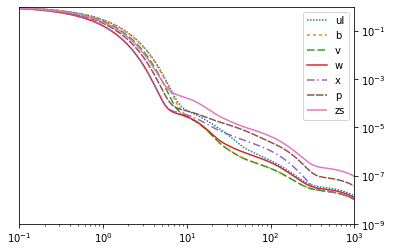

In [109]:
filter = ["ul","b","v","w","x","p","zs"]
styles = [(0, (1, 1)),(0, (2, 2)),(0, (5, 2)),'-',(0, (5, 2, 1, 2)),(0, (5, 1)),(0, (1, 0))]
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_xlim(10**(-1), 10**3)
ax.set_yscale('log')
ax.yaxis.tick_right()
ax.set_ylim(10**(-9), 1)
r = np.logspace(-1, 3, num=1000)
for i,f in enumerate(filter):
    print(i, f)
    fufoc = 0
    a = alphas[f]
    foc = np.exp(-a*np.array(r)) 
    for k in range(6):
        num = str(k + 1)
        fufoc = fufoc + ((Ai[f][num]*np.power(10.,-4))/(np.sqrt(2*np.pi)*sigma[k]))*np.exp(-np.power(r,2)/(2*np.power(sigma[k],2)))
    psf = fufoc + foc
    ax.plot(r, psf,linestyle=styles[i],label = f)
plt.legend(loc = 'upper right') 
plt.show()